The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.
The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [13]:
num_cols

['age', 'bmi', 'children', 'expenses']

In [14]:
cat_cols

['sex', 'smoker', 'region']

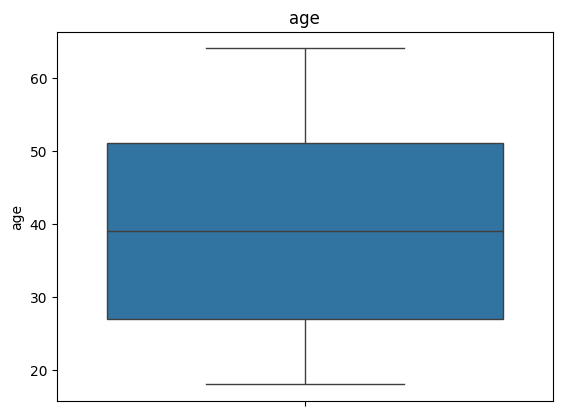

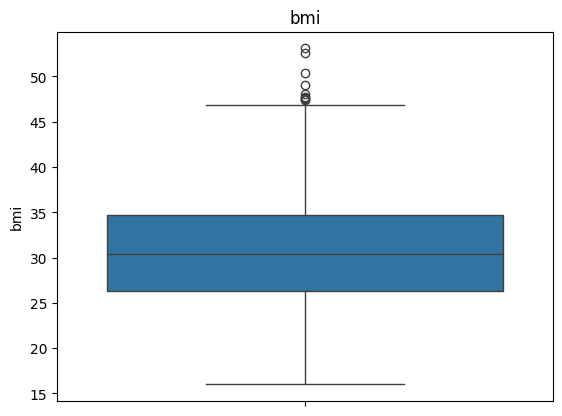

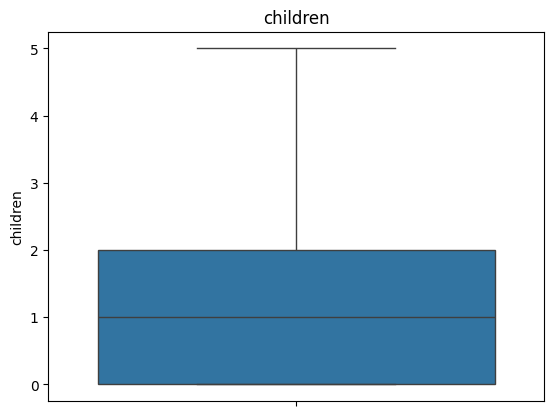

In [18]:
for col in num_cols[:-1]:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [22]:
upper_fence = df['bmi'].quantile(0.75)
iqr = upper_fence - df['bmi'].quantile(0.25)
upper_limit = upper_fence + 1.5*iqr
upper_limit

47.300000000000004

In [23]:
df.loc[df['bmi'] > upper_limit, 'bmi'] = upper_limit

<Axes: ylabel='bmi'>

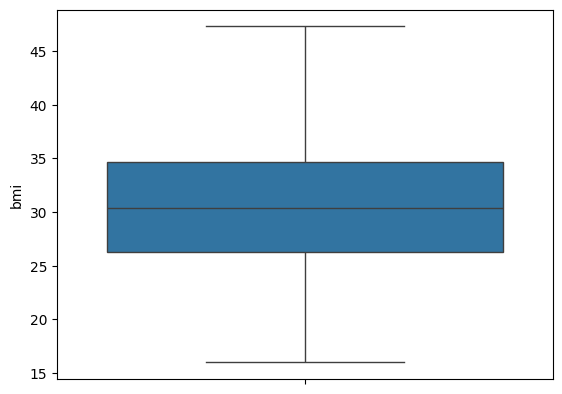

In [24]:
sns.boxplot(df['bmi'])

In [16]:
for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [31]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
#yes=1, no=0
#female=0, male=1
#southwest=3, southeast=2, northwest=1, northeast=0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [36]:
X = df.drop('expenses', axis=1)
y = df['expenses']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test, y_pred)

0.7328275342283272

### Regularisation with hyperparameter tuning

In [43]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [44]:
y_pred_ridge = ridge_model.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.7328478178907394

In [45]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [46]:
y_pred_lasso = lasso_model.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.7328305196426839

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 5.0, 10.0, 25.0, 100.0]}
grid = GridSearchCV(lasso_model, param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [0.1, 1.0, 5.0, 10.0, 25.0, 100.0]})

In [48]:
grid.best_params_

{'alpha': 100.0}

In [49]:
grid.best_score_

0.7443840389133738

In [50]:
y_pred_grid = grid.predict(X_test)

In [51]:
r2_score(y_test, y_pred_grid)

0.7345031809203699